# For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
print("Success")

Success


# 1
A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

<BarContainer object of 5 artists>

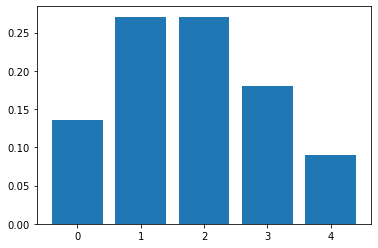

In [129]:
x = np.arange(0, 5)
y = stats.poisson(2).pmf(x)


plt.plot(x, y)

What is the probability that no cars drive up in the noon hour?

In [3]:
n_trials = nrows = 1_000_000
n_cars = ncols = 1

cars = np.random.poisson(2, 10000)
(cars == 0).mean()


0.1328

In [4]:
stats.poisson(2).pmf(0)

0.1353352832366127

What is the probability that 3 or more cars come through the drive through?

In [5]:
(cars >= 3).mean()

0.3176

In [6]:
stats.poisson(2).sf(2)

0.32332358381693654

How likely is it that the drive through gets at least 1 car?

In [7]:
(cars >= 1).mean()

0.8672

In [8]:
stats.poisson(2).sf(0)

0.8646647167633873

# 2
Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

* What grade point average is required to be in the top 5% of the graduating class?

In [87]:
pd.Series(np.random.normal(3, .3, size=(10000000))).quantile(.95)

3.4934005710189986

In [85]:
stats.norm(3.0, .3).ppf(.95)

3.4934560880854417

* What GPA constitutes the bottom 15% of the class?

In [88]:
pd.Series(np.random.normal(3, .3, size=(10000000))).quantile(.15)

2.689239333935589

In [89]:
stats.norm(3.0, .3).ppf(.15)

2.689069983151863

An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile.  Would a student with a 2.8 grade point average qualify for this scholarship?

In [91]:
# Yes
stats.norm(3.0, .3).ppf(.3)

2.842679846187588

In [94]:
print(f" The range would be {pd.Series(np.random.normal(3, .3, size=(10000000))).quantile(.2)} to {pd.Series(np.random.normal(3, .3, size=(10000000))).quantile(.3)}")

 The range would be 2.7473184089443548 to 2.842613018088369


If I have a GPA of 3.5, what percentile am I in?

In [14]:
stats.norm(3.0, .3).sf(3.5)

0.0477903522728147

In [96]:
(pd.Series(np.random.normal(3, .3, size=(10000000))) >= 3.5).mean()

0.0477058

# 3
A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [15]:
stats.poisson(.02).sf(96/4326)

0.0198013266932447

In [105]:
pd.Series(np.random.poisson(.02, 1000000) > (97/4326)).mean()

0.01979

# 4
You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

* What is the probability that at least one of your first 60 answers is correct?

In [16]:
# question = 100
# range = 1 - 60

stats.binom(60, .01).sf(0)

0.4528433576092388

In [110]:
pd.Series(np.random.binomial(60, .01, size=1000000) > 0).mean()

0.452837

# 5
The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? 

In [17]:
# .03 percent chance
# number of students who visit = 3 * 22 * .9 

stu_visit = 3 * 22 * .9
clean_chance = .03

stats.binom(stu_visit, clean_chance).sf(0)

0.8342199288437355

In [123]:
pd.Series(np.random.binomial(stu_visit, clean_chance, size=1000000) > 0).mean()

0.834093

How likely is it that it goes two days without getting cleaned up? 

In [125]:
stats.binom(stu_visit, clean_chance).pmf(3)

0.16078647382208258

AttributeError: module 'numpy' has no attribute 'binomial'

All week?

In [19]:
stats.binom(stu_visit, clean_chance).pmf(5)

0.02402743576261935

# 6

You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [20]:
# normal distrubted 
# avg 15 std 3
# 1hr lunhc 
# 15 mins left
# 2 min per order

stats.norm(15, 3)


# 7
Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [56]:
# Create a function named get_db_url. It should accept a username, hostname, password, and database name and...
# return a url formatted like in the examples in this lesson.

from env import host, user, password
def get_db_url(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
df = pd.read_sql("""select salary from salaries
where to_date > CURDATE() 
""", get_db_url('employees'))
df.describe()

,salary
count,240124.000000
mean,72012.235857
std,17309.995380
min,38623.000000
25%,59048.750000
50%,69805.000000
75%,82546.000000
max,158220.000000


* What percent of employees earn less than 60,000?

In [61]:
stats.norm(72012.235857, 17309.995380).cdf(60000)

0.2438574248045388

In [60]:
df['below_60k'] = df['salary'] < 60000
df['below_60k'].mean()

0.2705727041028802

* What percent of employees earn more than 95,000?

In [59]:
stats.norm(72012.235857, 17309.995380).sf(95000)

0.09208819199191742

In [62]:
df['more_than_95k'] = df['salary'] < 95000
df['more_than_95k'].mean()

0.8913686262097916

* What percent of employees earn between 65,000 and 80,000?

In [109]:
stats.norm(72012.235857, 17309.995380).cdf(80000) - stats.norm(72012.235857, 17309.995380).cdf(65000)

0.33506056854908584

In [100]:
df['between_65k_and_80k'] = (df['salary'] >= 65000) & (df['salary'] <= 80000)
df['between_65k_and_80k'].mean()

0.32515700221552196

* What do the top 5% of employees make?

In [57]:
stats.norm(72012.235857, 17309.995380).isf(.05)

100484.64454030624

In [81]:
df['salary'].quantile(.95)

104225.84999999998